# <b><u>GRIP-Internship</u></b>

## <b><u>Task 1</u></b>

In this task, we'll be predicting the score of a student based on the number of hours they've studied. 

As the data consisites of only 2 variables, `Hours` and `Scores` respectively. 
<br>We can use `simple-linear regression` for the task. 


### 1.1 <b>Importing of Libraries</b>
So, first we'll be importing the required libraries. <br>We'll need `Numpy`,  `Pandas`, `Matplotlib` and `SkLearn` for the required tasks.

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
%matplotlib inline 
print("Libraries imported succesfully")

Libraries imported succesfully


### 1.2 <b><u>Data Import</u></b>
After importing the libraries, we'll need to import and dataset and convert it into a pandas dataframe.<br>As the data is stored in `CSV` format, we'll be using `pd.read_csv()`.

In [37]:
df=pd.read_csv("student_scores.csv")
if df.shape!=[0,0]:
    print("Data Import Succesful")

Data Import Succesful


In [38]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
#Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
print("Data Description:")
print("-"*50)
print(f"Shape of the data: {df.shape}")
print("-"*50)
print(f"Number of Rows in DataFrame: {df.shape[0]}")
print(f"Type of DataFrame Rows: {df.dtypes[0]}")
print("-"*50)
print(f"Number of Columns in DataFrame: {df.shape[1]}")
print(f"Type of DataFrame Colums: {df.dtypes[0]}")
print("-"*50)
print(f"First 5 data points of the Dataframe: \n{df.head(5)}")


Data Description:
--------------------------------------------------
Shape of the data: (25, 2)
--------------------------------------------------
Number of Rows in DataFrame: 25
Type of DataFrame Rows: float64
--------------------------------------------------
Number of Columns in DataFrame: 2
Type of DataFrame Colums: float64
--------------------------------------------------
First 5 data points of the Dataframe: 
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [41]:
#Data discription
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 1.3 <b><u>Data Visualization</u></b>
For understanding the data clearly, we need to visualise it. Here, we are visualling the dataset using `scatter plot` from `matplotlib`. 
<br>The plot shows a linear relationship between the two variables, `"Hours"` and `"Scores"`. 

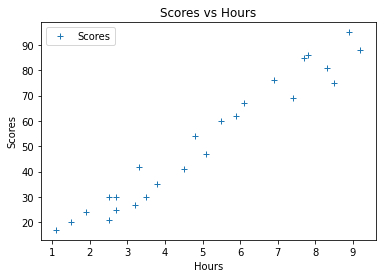

In [42]:
df.plot(x="Hours", y="Scores", style="+")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores vs Hours")
plt.show()

In [43]:
x=df.iloc[:, :1].values
y=df.iloc[:, 1].values
print("Data seperated into features and labels.")

Data seperated into features and labels.


### 1.4 <b><u>Dividing the data into traing and testing dataset</u></b>
For applying the machine learning model, we need to divide the given datset fro training and testing.<br>We can use `sklearn` for this task, using the method `train_test_split()` from `sklearn.model_selection`. 

In [44]:
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=0)
print("Data Succesfully divided into training and test data.")

Data Succesfully divided into training and test data.


### 1.5 <b><u>Applying the Linear Regression Model</u></b>
Here we'll start training the model using `sklearn.linear_model`, which contains the linear regression model.  

In [45]:
regression_model=LinearRegression()
regression_model.fit(x_train, y_train)
print("Training complete")

Training complete


### 1.6 <b><u>Prediction</b></u>
Using the trained regression model and the test dataset.<br>We'll also compare the predicted and actual labels to understand the accuracy of the model.

In [46]:
y_predict=regression_model.predict(x_test)
print(y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [47]:
print(y_test)

[20 27 69 30 62]


In [48]:
label_comparison=pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
label_comparison

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 1.7 <b><u>Evaluation</u></b>
Now, we'll evaluate the model by visualising the predicted regression line, and evaluating the error of the predicted outcome.<br> For evauating the loss we'll use `mean_squared_error` and `mean_absolute_error`.

Text(0, 0.5, 'Scores')

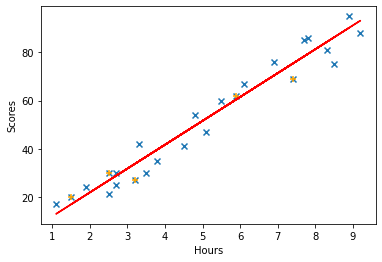

In [49]:
reg_line=regression_model.coef_*x+regression_model.intercept_
plt.plot(x, reg_line, color="red")
plt.scatter(x,y, marker='x')
plt.scatter(x_test, y_test, color="orange", marker="+")
plt.xlabel("Hours")
plt.ylabel("Scores")

We'll also evalaute the model by giving a random input and predicting the outcome.<br>
In this case, the random input(hours) is 9.25, for which we get a prediction of 93.692 points(approx.).

In [52]:
your_data=9.25
your_data=np.array([[your_data]])
your_predict=regression_model.predict(your_data)
print(f"The predicted score after {your_data[0][0]} is {your_predict[0]}")


The predicted score after 9.25 is 93.69173248737538


In [54]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 
print('Mean Sqaured Error: ', metrics.mean_squared_error(y_test, y_predict))

Mean Absolute Error: 4.183859899002975
Mean Sqaured Error:  21.5987693072174
